# Visualización de Datos 
**Actividad 3**

Alicia Christyna Martínez Parra

In [1]:
import pandas as pd
from utils import path_loader as p
import matplotlib.pyplot as plt

In [2]:
# Load csv file
try:
    df = pd.read_csv(p.generate_file_path(
        file_name='avocado_prices_processed', file_extension='csv', directory='output'))

    n_row, n_col = df.shape
    print(f'CSV File loaded succesfully!\nThere are {n_row} rows and {n_col} columns')
except Exception as e:
    print(f'Something wrong happended!: {e}')

CSV File loaded succesfully!
There are 18249 rows and 13 columns


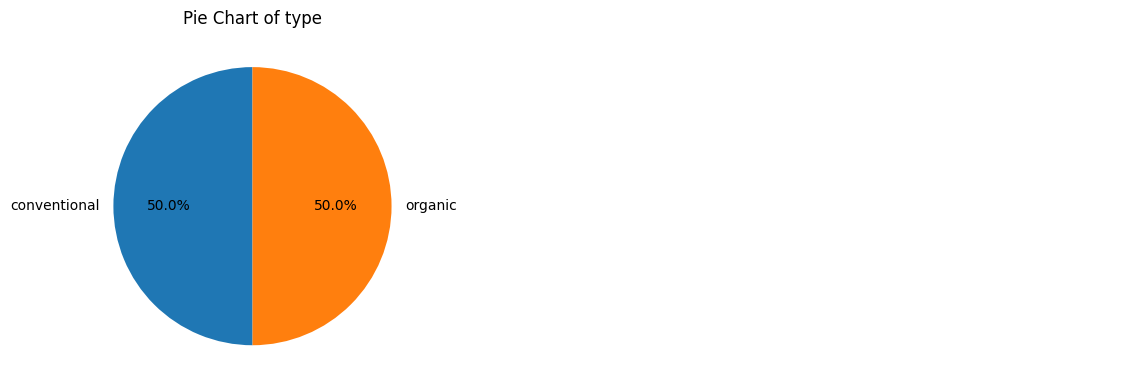

In [3]:
# Pie charts for categorical variables
pie_cols = ['type']
rows, cols = len(pie_cols) // 2 + len(pie_cols) % 2, 2
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten()

for i, col in enumerate(pie_cols):
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[i])
    axes[i].set_title(f'Pie Chart of {col}')
    axes[i].set_ylabel('')
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

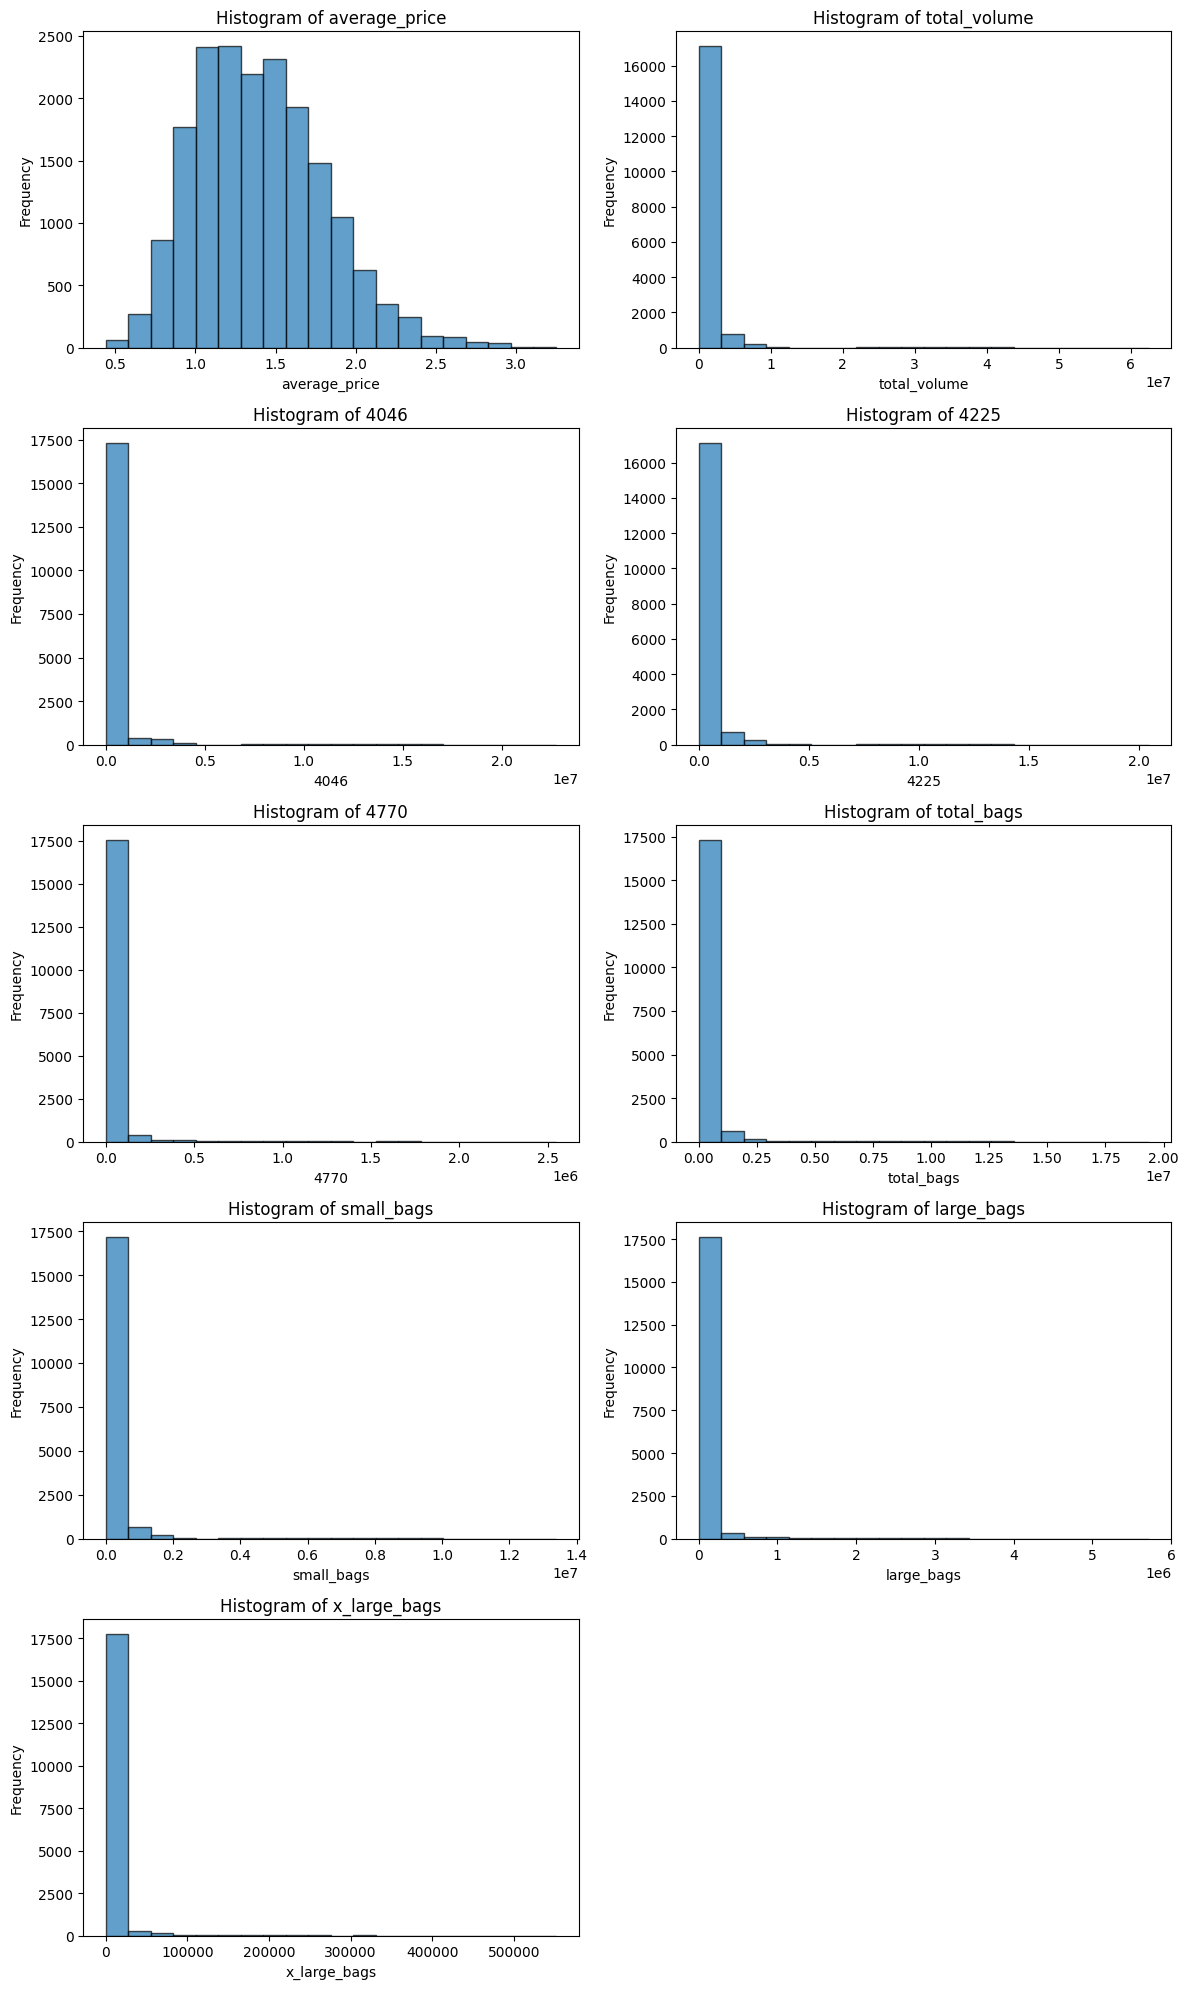

In [4]:
# Histograms for numerical variables
histogram_cols = ['average_price', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'x_large_bags']
rows, cols = len(histogram_cols) // 2 + len(histogram_cols) % 2, 2
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten()

for i, col in enumerate(histogram_cols):
    df[col].plot.hist(bins=20, alpha=0.7, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

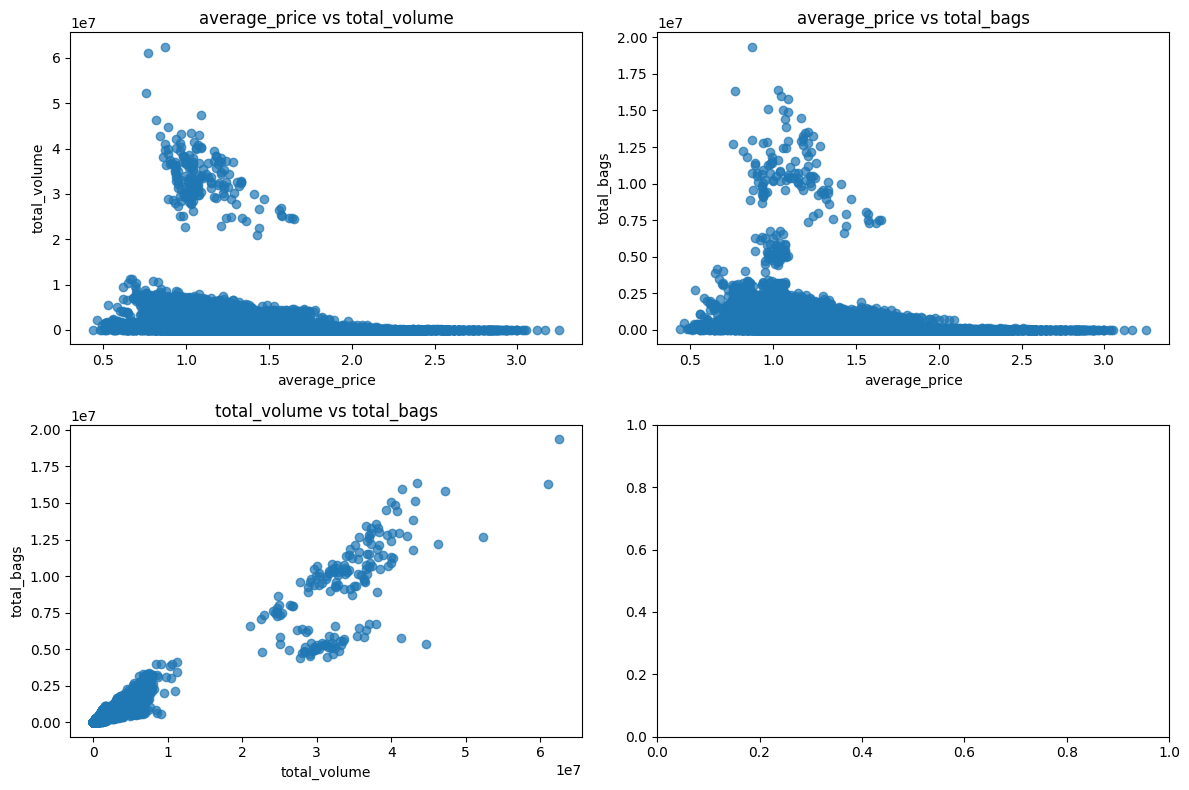

In [5]:
# Scatter plots between pairs of numerical columns
scatter_cols = ['average_price', 'total_volume',
       'total_bags']
rows, cols = len(scatter_cols) - 1, len(scatter_cols) - 1
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten()

count = 0
for i in range(len(scatter_cols)):
    for j in range(i + 1, len(scatter_cols)):
        ax = plt.subplot(rows, cols, count + 1)
        ax.scatter(df[scatter_cols[i]], df[scatter_cols[j]], alpha=0.7)
        ax.set_title(f'{scatter_cols[i]} vs {scatter_cols[j]}')
        ax.set_xlabel(scatter_cols[i])
        ax.set_ylabel(scatter_cols[j])
        count += 1
plt.tight_layout()
plt.show()

In [7]:
df.columns

Index(['date', 'average_price', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'x_large_bags', 'type',
       'year', 'region'],
      dtype='object')

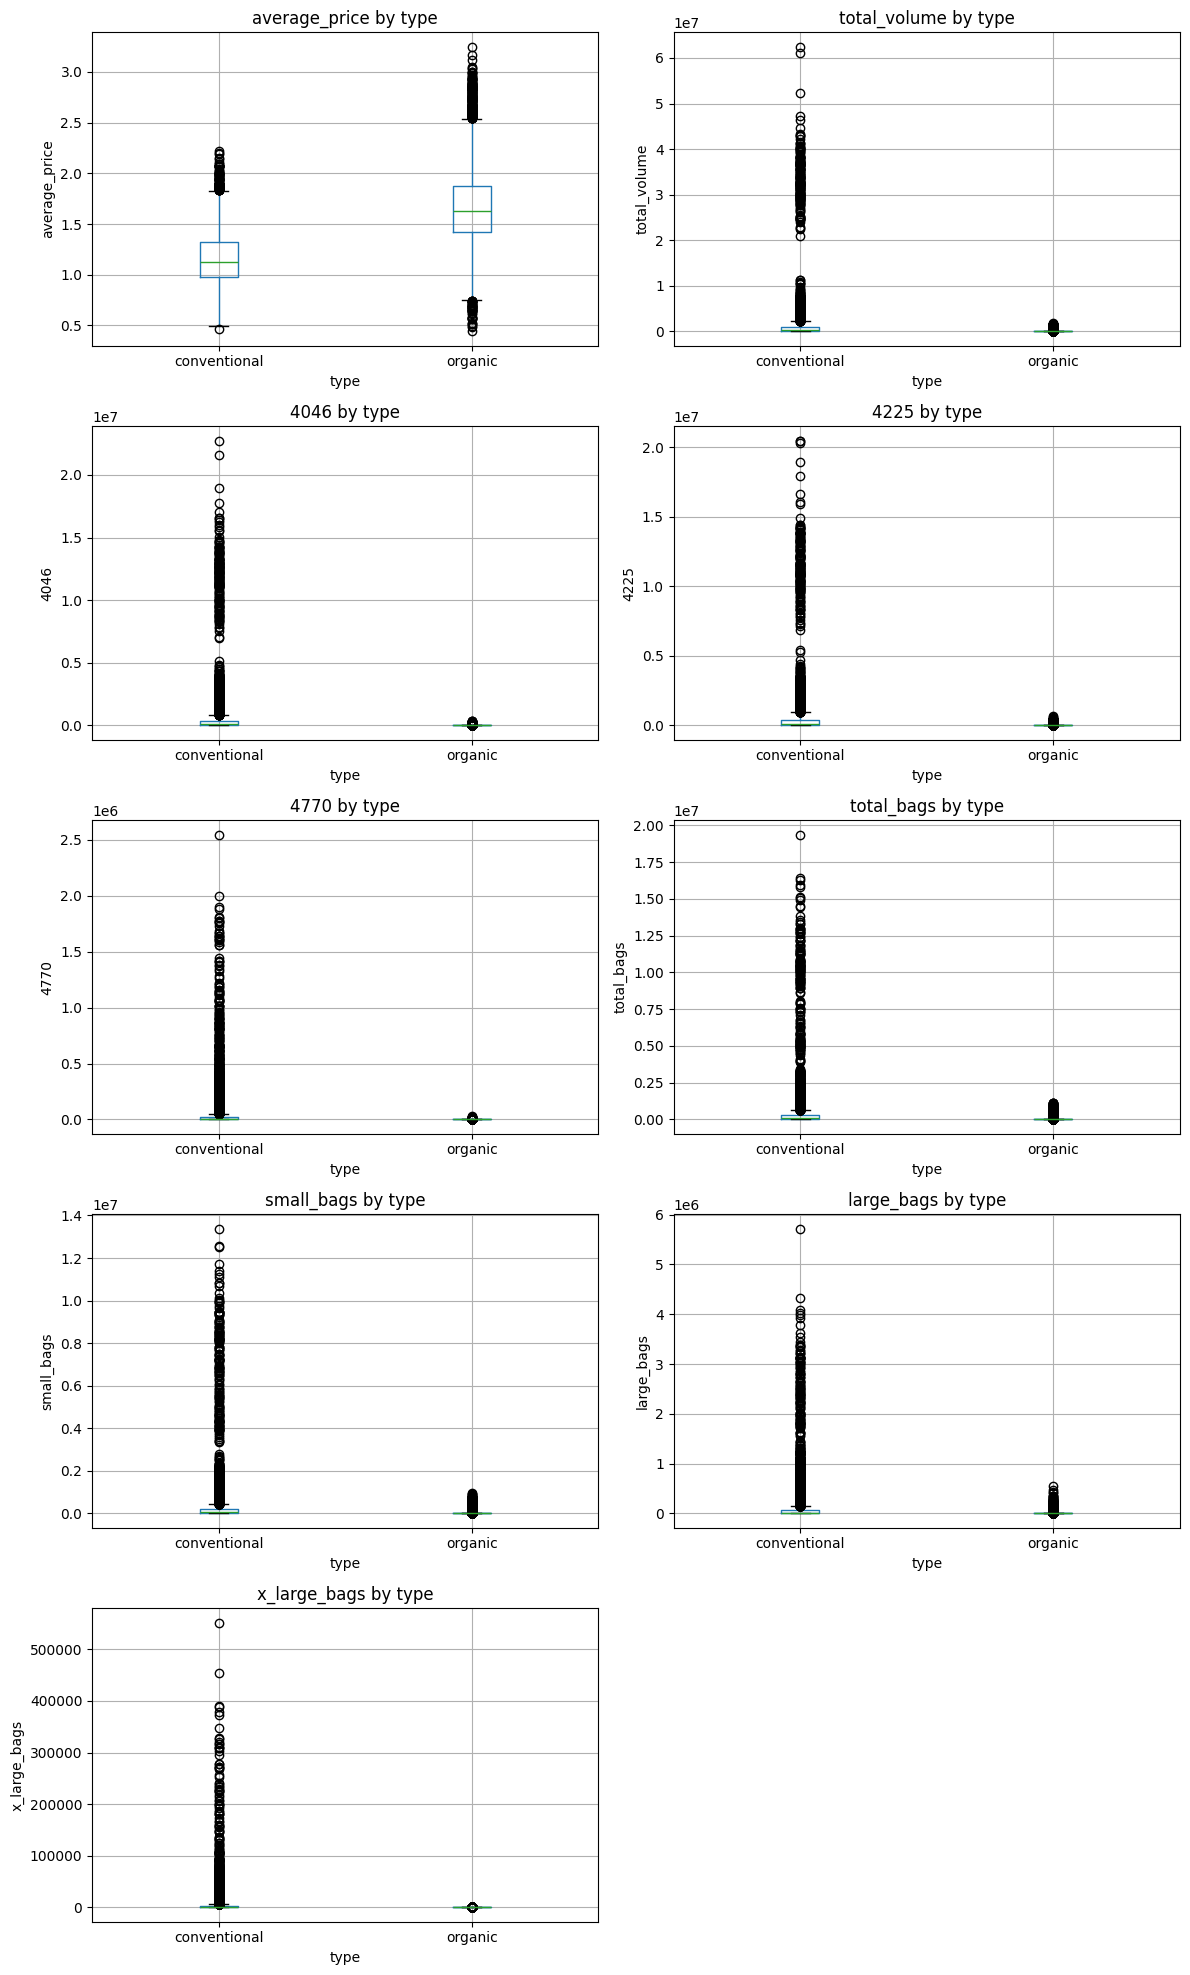

In [9]:
# Boxplots for numerical variables grouped by each categorical variable
boxplot_cols = ['type']
numerical_cols = [ 'average_price', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'x_large_bags']

for cat_col in boxplot_cols:
    rows, cols = len(numerical_cols) // 2 + len(numerical_cols) % 2, 2
    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
    axes = axes.flatten()
    
    for i, num_col in enumerate(numerical_cols):
        df.boxplot(column=num_col, by=cat_col, ax=axes[i])
        axes[i].set_title(f'{num_col} by {cat_col}')
        axes[i].set_xlabel(cat_col)
        axes[i].set_ylabel(num_col)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    plt.suptitle('')  # Suppress the default title
    plt.tight_layout()
    plt.show()

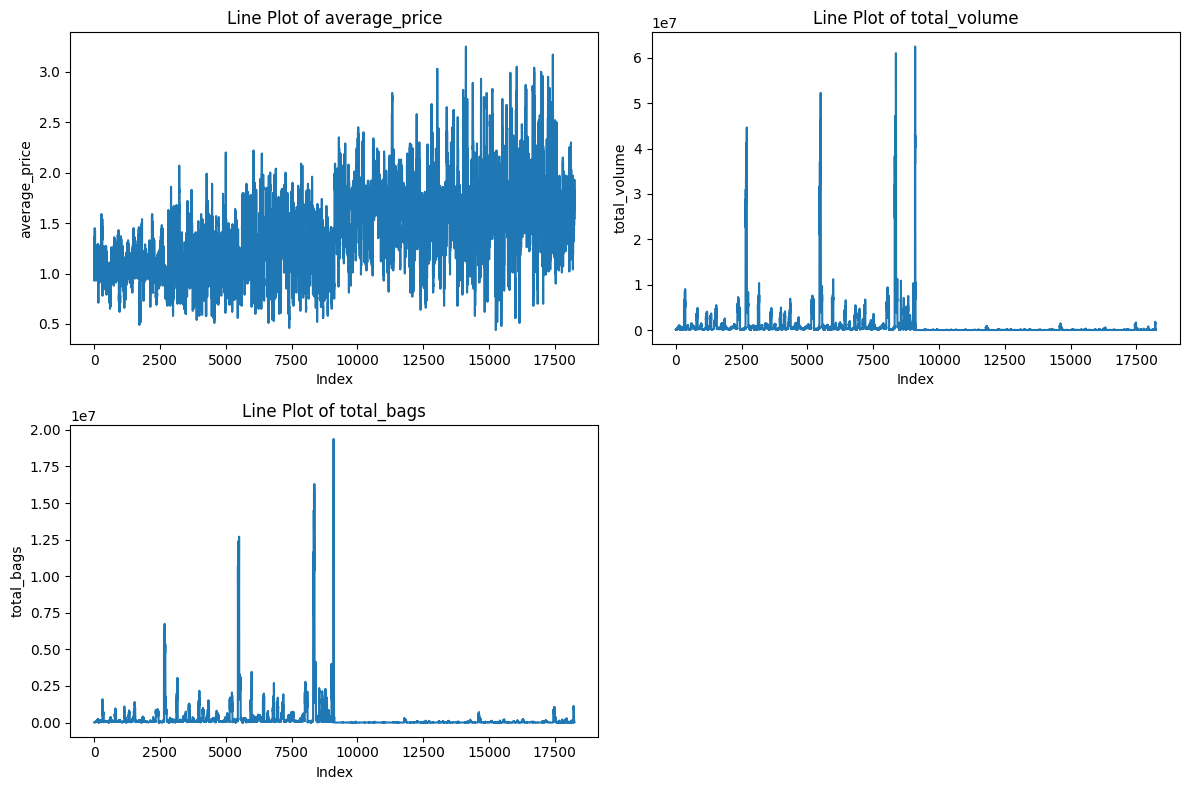

In [ ]:
# Line plots for numerical columns
rows, cols = len(numerical_cols) // 2 + len(numerical_cols) % 2, 2
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    df[col].plot.line(ax=axes[i])
    axes[i].set_title(f'Line Plot of {col}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(col)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()